In [62]:
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
white = pd.read_csv('data/wine-quality-white.csv', sep=';')
red = pd.read_csv('data/wine-quality-red.csv', sep=';')

In [6]:
white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [7]:
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [15]:
# combine datasets

white['type'] = 0
red['type'] = 1

wines = red.append(white, ignore_index=True)

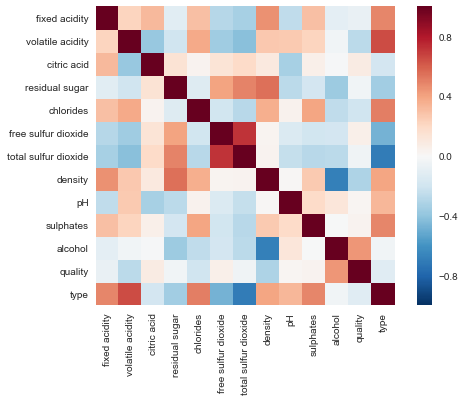

In [21]:
# correlation heatmap

sns.heatmap(wines.corr(), square=True)

In [36]:
# prep data

X=wines.iloc[:, 0:11]
y=np.ravel(wines.type)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=123)

In [37]:
# standardize data

scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [38]:
# set up network model

model = Sequential()
model.add(Dense(12, activation='relu', input_shape=(11,)))  # input layer
model.add(Dense(8, activation='relu'))  # hidden layer
model.add(Dense(1, activation='sigmoid'))  # output layer

In [49]:
# some model info

model.output_shape

(None, 1)

In [50]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                144       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 104       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.get_config()

[{'class_name': 'Dense',
  'config': {'activation': 'relu',
   'activity_regularizer': None,
   'batch_input_shape': (None, 11),
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'dtype': 'float32',
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'distribution': 'uniform',
     'mode': 'fan_avg',
     'scale': 1.0,
     'seed': None}},
   'kernel_regularizer': None,
   'name': 'dense_1',
   'trainable': True,
   'units': 12,
   'use_bias': True}},
 {'class_name': 'Dense',
  'config': {'activation': 'relu',
   'activity_regularizer': None,
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'VarianceScaling',
    'config': {'distribution': 'uniform',
     'mode': 'fan_avg',
     'scale': 1.0,
     'seed': None}},
   'kernel_re

In [52]:
model.get_weights()

[array([[-0.10680693, -0.08591539, -0.47155416, -0.01963422,  0.00743216,
          0.08927256, -0.25591215,  0.48419005, -0.33989039, -0.39429611,
          0.25671852,  0.21114701],
        [-0.4069269 , -0.49513626,  0.07631379, -0.37555802, -0.11577091,
          0.44715679, -0.24686685,  0.45767564,  0.25089425, -0.31552017,
          0.03876287, -0.05755442],
        [-0.15552267, -0.1803844 ,  0.23843551, -0.33501446,  0.34099376,
         -0.26049218,  0.07161582,  0.27175885, -0.13513198, -0.22254604,
         -0.32050189, -0.20659474],
        [-0.07029858,  0.17893332,  0.43232745,  0.35645521, -0.24512464,
          0.40613186, -0.18192565,  0.43780154, -0.39023411,  0.20972627,
         -0.11043847, -0.22037533],
        [-0.50122809,  0.18841118,  0.0475812 ,  0.10347277,  0.21451426,
         -0.16709468,  0.00279456,  0.38054609,  0.18746406, -0.46781388,
          0.21350819,  0.3351227 ],
        [ 0.24184263,  0.20872784, -0.3328054 ,  0.22220141, -0.14514893,
      

In [76]:
# compile and run model

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
                   
model.fit(X_train, y_train, epochs=5, batch_size=1)

Epoch 1/5
4352/4352 [==============================] - 16s - loss: 0.0156 - acc: 0.9972    
Epoch 2/5
4352/4352 [==============================] - 14s - loss: 0.0153 - acc: 0.9968    
Epoch 3/5
4352/4352 [==============================] - 13s - loss: 0.0139 - acc: 0.9968    
Epoch 4/5
4352/4352 [==============================] - 14s - loss: 0.0135 - acc: 0.9972    
Epoch 5/5
4352/4352 [==============================] - 14s - loss: 0.0128 - acc: 0.9972    


In [71]:
# evaluate model

y_pred = model.predict_classes(X_test)
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)

2145/2145 [==============================] - 0s     


In [60]:
print('loss: ', loss)
print('accuracy: ', accuracy)

loss:  0.0202877674292
accuracy:  0.995337995338


In [74]:
# more evaluation metrics

confusion_matrix(y_test, y_pred)

array([[1603,    1],
       [   9,  532]])

In [75]:
print('precision: ', precision_score(y_test, y_pred))
print('recall: ', recall_score(y_test, y_pred))
print('f1 score: ', f1_score(y_test,y_pred))

precision:  0.998123827392
recall:  0.983364140481
f1 score:  0.990689013035
